# import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

# import dataset

In [2]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [3]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [8]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [ ]:
### Define basic problem
# how accurately identify high risk individuals (smokers) before they incur policy charges?
# predict a customer being a smoker (yes/no) based on demographic and health-related attributes?
# target variable encoding
insurance['smoker'] = insurance['smoker'].map({'yes':1, 'no':0})

In [10]:
# catagorical variable onehot encoding
insurance_encoded = pd.get_dummies(insurance, columns= ['sex', 'region'], drop_first=True)

In [11]:
# split data into X and y
X = insurance_encoded.drop(columns=['charges', 'smoker'])
y = insurance_encoded['smoker']

In [12]:
# split data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# model training
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [15]:
# model fitting
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# model prediction

In [16]:
# model prediction
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

# model evaluation

In [17]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [18]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[266   0]
 [ 69   0]]


In [19]:
# classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89       266
           1       0.00      0.00      0.00        69

    accuracy                           0.79       335
   macro avg       0.40      0.50      0.44       335
weighted avg       0.63      0.79      0.70       335



c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7940298507462686


ROC AUC Score: 0.5631469979296067


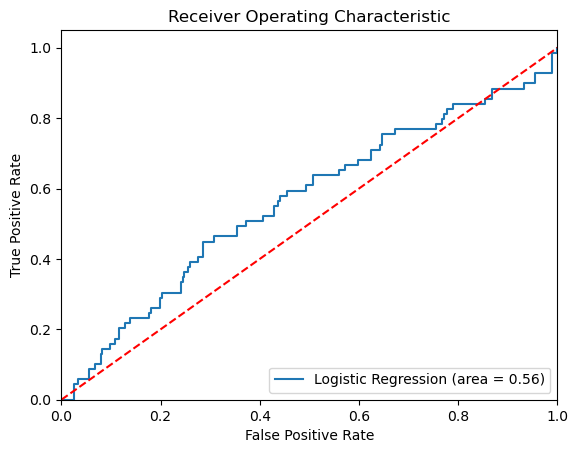

In [21]:
# roc auc score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)
# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Genral rule to interpretation of ROC AUC Score:
# 0.5 → Random guessing

# 0.7–0.8 → Good

# 0.8–0.9 → Very good

# 0.9 → Excellent

# model interpretation (odds ratios)

In [22]:
# coefficients interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
coefficients.drop(columns='Abs_Coefficient', inplace=True)
print("Feature Coefficients:\n", coefficients)
# Positive coefficients increase the log-odds of the outcome (smoker = 1)
# Negative coefficients decrease the log-odds of the outcome (smoker = 0)


Feature Coefficients:
             Feature  Coefficient
3          sex_male     0.154821
5  region_southeast     0.129683
4  region_northwest    -0.108835
0               age    -0.106987
1               bmi    -0.069863
6  region_southwest    -0.063726
2          children     0.001121


# feature importance

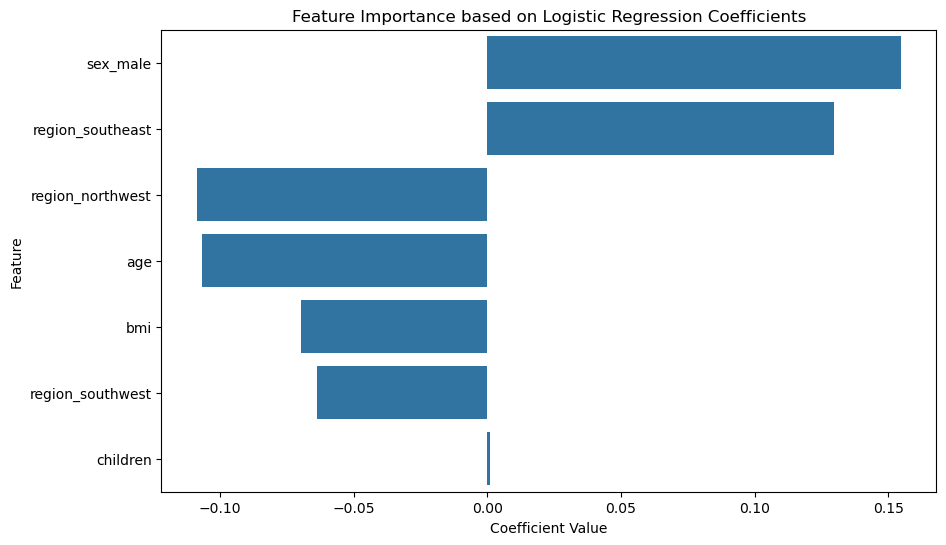

In [23]:
# feature importance visualization
import seaborn as sns
plt.figure(figsize=(10,6))  
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

